In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import warnings
import random
warnings.filterwarnings("ignore")


In [2]:
btc = pd.read_csv('BTC-USD.csv')
eth = pd.read_csv('ETH-USD.csv')
spy = pd.read_csv('SPY.csv')

In [3]:
spy['Date']

0      2023-01-03
1      2023-01-04
2      2023-01-05
3      2023-01-06
4      2023-01-09
          ...    
321    2024-04-15
322    2024-04-16
323    2024-04-17
324    2024-04-18
325    2024-04-19
Name: Date, Length: 326, dtype: object

## Data preprocessing

### Convert column name to perspective column name

In [4]:
btc.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
1,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227
2,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
3,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
4,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566


In [6]:
#Check for any missing data
print(btc.isna().sum())
print(eth.isna().sum())
print(spy.isna().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
for i in btc.columns:
    if i != 'Date':
        btc['btc' +i] = btc[i]
        btc = btc.drop(i, axis = 1)

In [8]:
for i in eth.columns:
    if i != 'Date':
        eth['eth' +i] = eth[i]
        eth = eth.drop(i, axis = 1)

In [9]:
for i in spy.columns:
    if i != 'Date':
        spy['spy' +i] = spy[i]
        spy = spy.drop(i, axis = 1)

In [10]:
eth.columns

Index(['Date', 'ethOpen', 'ethHigh', 'ethLow', 'ethClose', 'ethAdj Close',
       'ethVolume'],
      dtype='object')

In [11]:
spy.columns

Index(['Date', 'spyOpen', 'spyHigh', 'spyLow', 'spyClose', 'spyAdj Close',
       'spyVolume'],
      dtype='object')

https://realpython.com/pandas-merge-join-and-concat/

In [12]:
df = pd.merge(btc, eth, on = ["Date"])

In [13]:
df.head()

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume
0,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700,1196.713623,1203.475342,1192.885376,1200.964844,1200.964844,2399674550
1,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,1201.103271,1219.860596,1195.214966,1214.656616,1214.656616,3765758498
2,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,1214.744019,1219.095337,1207.491577,1214.778809,1214.778809,3392972131
3,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,1214.718628,1264.807495,1213.168823,1256.526611,1256.526611,6404416893
4,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,1256.484619,1258.571533,1245.173096,1250.438599,1250.438599,4001786456


In [14]:
df = pd.merge(df, spy, on = ['Date'])

In [15]:
df.head()

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume,spyOpen,spyHigh,spyLow,spyClose,spyAdj Close,spyVolume
0,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,1214.744019,1219.095337,1207.491577,1214.778809,1214.778809,3392972131,384.369995,386.429993,377.829987,380.820007,373.956818,74850700
1,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,1214.718628,1264.807495,1213.168823,1256.526611,1256.526611,6404416893,383.179993,385.880005,380.000000,383.760010,376.843842,85934100
2,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,1256.484619,1258.571533,1245.173096,1250.438599,1250.438599,4001786456,381.720001,381.839996,378.760010,379.380005,372.542755,76970500
3,2023-01-06,16836.472656,16991.994141,16716.421875,16951.968750,16951.968750,14413662913,1250.458984,1273.220337,1240.947510,1269.379028,1269.379028,4977252792,382.609985,389.250000,379.410004,388.079987,381.085938,104189600
4,2023-01-09,17093.992188,17389.957031,17093.992188,17196.554688,17196.554688,18624736866,1287.450806,1342.144165,1286.680786,1321.538940,1321.538940,7990438824,390.369995,393.700012,387.670013,387.859985,380.869934,73978100


In [16]:
btc.shape

(477, 7)

In [17]:
spy.shape

(326, 7)

In [18]:
df.shape

(326, 19)

In [19]:
df.shape

(326, 19)

In [20]:
# Remove all string value for convertion Date to float
dateColumn = df["Date"]
df["Date"] = df["Date"].str.replace("-",'')
df["Date"] = pd.to_numeric(df['Date'], errors='coerce',downcast="integer")


In [21]:
print(df.dtypes)

Date              int32
btcOpen         float64
btcHigh         float64
btcLow          float64
btcClose        float64
btcAdj Close    float64
btcVolume         int64
ethOpen         float64
ethHigh         float64
ethLow          float64
ethClose        float64
ethAdj Close    float64
ethVolume         int64
spyOpen         float64
spyHigh         float64
spyLow          float64
spyClose        float64
spyAdj Close    float64
spyVolume         int64
dtype: object


In [22]:
df.columns

Index(['Date', 'btcOpen', 'btcHigh', 'btcLow', 'btcClose', 'btcAdj Close',
       'btcVolume', 'ethOpen', 'ethHigh', 'ethLow', 'ethClose', 'ethAdj Close',
       'ethVolume', 'spyOpen', 'spyHigh', 'spyLow', 'spyClose', 'spyAdj Close',
       'spyVolume'],
      dtype='object')

In [23]:
df.head(10)

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume,spyOpen,spyHigh,spyLow,spyClose,spyAdj Close,spyVolume
0,20230103,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,1214.744019,1219.095337,1207.491577,1214.778809,1214.778809,3392972131,384.369995,386.429993,377.829987,380.820007,373.956818,74850700
1,20230104,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,1214.718628,1264.807495,1213.168823,1256.526611,1256.526611,6404416893,383.179993,385.880005,380.000000,383.760010,376.843842,85934100
2,20230105,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,1256.484619,1258.571533,1245.173096,1250.438599,1250.438599,4001786456,381.720001,381.839996,378.760010,379.380005,372.542755,76970500
3,20230106,16836.472656,16991.994141,16716.421875,16951.968750,16951.968750,14413662913,1250.458984,1273.220337,1240.947510,1269.379028,1269.379028,4977252792,382.609985,389.250000,379.410004,388.079987,381.085938,104189600
4,20230109,17093.992188,17389.957031,17093.992188,17196.554688,17196.554688,18624736866,1287.450806,1342.144165,1286.680786,1321.538940,1321.538940,7990438824,390.369995,393.700012,387.670013,387.859985,380.869934,73978100
5,20230110,17192.949219,17484.720703,17162.990234,17446.292969,17446.292969,15808338949,1321.395508,1342.757202,1318.527222,1336.586060,1336.586060,5830173253,387.250000,390.649994,386.269989,390.579987,383.540924,65358100
6,20230111,17446.359375,17934.896484,17337.994141,17934.896484,17934.896484,18372283782,1336.486816,1387.932739,1323.583130,1387.932739,1387.932739,6314904311,392.230011,395.600006,391.380005,395.519989,388.391876,68881100
7,20230112,18117.593750,19030.087891,17995.203125,18869.587891,18869.587891,34971338710,1405.351440,1432.281250,1378.422119,1417.938477,1417.938477,12230193038,396.670013,398.489990,392.420013,396.959991,389.805939,90157700
8,20230113,18868.906250,19964.322266,18753.164063,19909.574219,19909.574219,29225029694,1417.946167,1461.672729,1404.023926,1451.614868,1451.614868,7684148212,393.619995,399.100006,393.339996,398.500000,391.318146,63903900
9,20230117,21175.833984,21438.660156,20978.533203,21161.519531,21161.519531,24999983362,1577.107422,1594.000977,1553.335938,1567.846069,1567.846069,7599462786,398.480011,400.230011,397.059998,397.769989,390.601318,62677300


In [24]:
# Updated Linear Regression from scratch for predicting high, I'm going to add regularization to this - Guiller

In [25]:
 
class LinearRegressionRegularization:
    def __init__(self, max_iter=10,  learningRate=50, random_state=None):
        self.max_iter_ = max_iter
        self.alpha = learningRate
        self.random_state_ = random_state
        self.w_ = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        self.w0 = 0
        
    def _split(self, X, y, ratio, random_state):
        header = X.columns
        # remove header for shuffling 
        x_data = X.values

        random.seed(random_state)
        train_ratio = ratio
        test_ratio = 1 - train_ratio
        
        total_data_sample = len(X)
        train_samples = int(total_data_sample * train_ratio)
        test_samples = total_data_sample - train_samples

        random.shuffle(x_data)
        shuffled_data = pd.DataFrame(x_data, columns=header)

        train_data = shuffled_data.head(train_samples)
        test_data = shuffled_data.head(test_samples)
        
        return train_data, test_data
        
    def _predict(self, x_train, y_train):
        #TO-DO : Add Regularization 
        
        x_train_array = x_train.to_numpy()
        m = len(y_train) # number of features 
        #Initial weights 
        tempWeights = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
        tempW0 = 0
        y_pred_btc = tempW0
        
        for idx in range (self.max_iter_): 
            for i in range (m):
                summation = []
                xi = x_train_array[i, :]
                y_pred_btc = tempW0
                for k in range (17):
                    y_pred_btc += self.w_[k] * xi[k]
                summation.append(y_pred_btc - y_train)

                derivative = 2/m * sum(summation)
                tempW0 = self.w0 - (self.alpha * derivative)

            for j in range (17):
                for i in range (m): 
                    summation = []
                    xi = x_train_array[i, :]
                    y_pred_btc = tempW0 
                    for k in range (17):
                        y_pred_btc += self.w_[k] * xi[k]  

                    summation.append(y_pred_btc - y_train)
                derivative = 2/m * sum(summation)
                tempWeights.append(self.w_[j] - (self.alpha * derivative))    

            #The previous iteration 
            last_17 = tempWeights[-17:]

            #Assigning new weight values to old weights
            for n in range (17):
                tempWeights[n] = last_17[n]
            self.w0 = tempW0
            #next iteration

        final_weights = tempWeights[:17]
        self.w_ = final_weights
        
        return y_pred_btc
    

In [26]:
# Utils

In [27]:
class Utils:
    
    def _updateTrainingData(self, x_train):
        for i in x_train.columns:
            if i != 'Date':
                x_train['yesterday_' +i] = x_train[i]
                x_train['twoDaysAgo_' +i] = x_train[i]
                x_train['threeDaysAgo_' +i] = x_train[i]
                x_train['fourDaysAgo_' +i] = x_train[i]
                x_train['fiveDaysAgo_' +i] = x_train[i]
                x_train['sixDaysAgo_' +i] = x_train[i]
                x_train['sevenDaysAgo_' +i] = x_train[i]
                x_train['yesterday_' +i] = x_train['yesterday_' +i].shift(1)
                x_train['twoDaysAgo_' +i] = x_train['twoDaysAgo_' +i].shift(2)
                x_train['threeDaysAgo_' +i] = x_train['threeDaysAgo_' +i].shift(3)
                x_train['fourDaysAgo_' +i] = x_train['fourDaysAgo_' +i].shift(4)
                x_train['fiveDaysAgo_' +i] = x_train['fiveDaysAgo_' +i].shift(5)
                x_train['sixDaysAgo_' +i] = x_train['sixDaysAgo_' +i].shift(6)
                x_train['sevenDaysAgo_' +i] = x_train['sevenDaysAgo_' +i].shift(7)
                x_train = x_train.drop(i, axis = 1)
        return x_train
    
    def _updateDate(self, x_train):
        x_train["Date"]
        x_train['Date'] = x_train['Date'].astype(str)
        
        for k in range (len(x_train["Date"])):
            size = len(x_train["Date"][k])
            string = x_train["Date"][k]
            substring_to_remove = ".0"
            x_train['Date'][k] = string.replace(substring_to_remove, "")

        for k in range (len(x_train["Date"])):
            size = len(x_train["Date"][k])
            string = x_train["Date"][k]
            x_train['Date'][k] = string[:4] + "-" + string[4:]
            #print(result)

        for k in range (len(x_train["Date"])):
            size = len(x_train["Date"][k])
            string = x_train["Date"][k]
            x_train['Date'][k] = string[:7] + "-" + string[7:]
        
        return x_train['Date']
    
    def _replaceNanY(self, y_train):
        column_means_7days =  y_train.tail(7).mean()
        df_filled = y_train_btcHigh.fillna(column_means_7days)
        y_train = df_filled
        
        return y_train
    
    def _replaceNanX(self, x_train):
        column_means = x_train.mean()
        df_filled = x_train.fillna(column_means)
        x_train = df_filled
        
        return x_train
    
    def _newTrainingData(self, new_row, x_train):
        index = len(x_train)
        x_train.loc[index] = new_row
        x_train_temp = x_train
        return x_train_temp

    
    def _newTrainLabel(self, y_train):
        column_means_7days = y_train.tail(7).mean()
        new_row = pd.Series({'btcHigh': column_means_7days})
        y_train_temp = y_train.append(new_row, ignore_index=True)
        return y_train_temp
    
    
    

In [28]:
model = LinearRegressionRegularization()
utils = Utils()

#Split the data for predicting High
X = df
y = df['btcHigh']

# Split the data into training subsets
train_data, test_data, = model._split(X, y, ratio=0.7, random_state=123 )
X_train_btcHigh = train_data.drop(columns=['btcHigh'])
y_train_btcHigh = train_data['btcHigh']

#Adjust training data 
X_train_btcHigh = utils._updateTrainingData(X_train_btcHigh)
X_train_btcHigh = utils._replaceNanX(X_train_btcHigh)

has_nan = X_train_btcHigh.isna().any().any()
if (has_nan != True):
    #Predict
    y_pred_btcHigh = model._predict(X_train_btcHigh, y_train_btcHigh)
else:
    print ("Training Data contains Nan values, ", has_nan)

pd.options.mode.chained_assignment = None  #Hide warning
X_train_btcHigh["Date"] = utils._updateDate(X_train_btcHigh)

In [29]:
X_train_btcHigh.head(10)

,Date,yesterday_btcOpen,twoDaysAgo_btcOpen,threeDaysAgo_btcOpen,fourDaysAgo_btcOpen,fiveDaysAgo_btcOpen,sixDaysAgo_btcOpen,sevenDaysAgo_btcOpen,yesterday_btcLow,twoDaysAgo_btcLow,...,fiveDaysAgo_spyAdj Close,sixDaysAgo_spyAdj Close,sevenDaysAgo_spyAdj Close,yesterday_spyVolume,twoDaysAgo_spyVolume,threeDaysAgo_spyVolume,fourDaysAgo_spyVolume,fiveDaysAgo_spyVolume,sixDaysAgo_spyVolume,sevenDaysAgo_spyVolume
0,2023-01-03,24132.090997,24127.712312,24116.058177,24099.011684,24073.014504,24088.267965,24120.959347,23741.355753,23736.684017,...,402.256368,402.349253,402.484124,8.299598e+07,8.287515e+07,8.297350e+07,8.298511e+07,8.294435e+07,8.292626e+07,8.295321e+07
1,2023-01-03,16688.847656,24127.712312,24116.058177,24099.011684,24073.014504,24088.267965,24120.959347,16622.371094,23736.684017,...,402.256368,402.349253,402.484124,7.485070e+07,8.287515e+07,8.297350e+07,8.298511e+07,8.294435e+07,8.292626e+07,8.295321e+07
2,2023-01-04,16688.847656,16688.847656,24116.058177,24099.011684,24073.014504,24088.267965,24120.959347,16622.371094,16622.371094,...,402.256368,402.349253,402.484124,7.485070e+07,7.485070e+07,8.297350e+07,8.298511e+07,8.294435e+07,8.292626e+07,8.295321e+07
3,2023-01-05,16680.205078,16688.847656,16688.847656,24099.011684,24073.014504,24088.267965,24120.959347,16667.763672,16622.371094,...,402.256368,402.349253,402.484124,8.593410e+07,7.485070e+07,7.485070e+07,8.298511e+07,8.294435e+07,8.292626e+07,8.295321e+07
4,2023-01-04,16863.472656,16680.205078,16688.847656,16688.847656,24073.014504,24088.267965,24120.959347,16790.283203,16667.763672,...,402.256368,402.349253,402.484124,7.697050e+07,8.593410e+07,7.485070e+07,7.485070e+07,8.294435e+07,8.292626e+07,8.295321e+07
5,2023-01-09,16680.205078,16863.472656,16680.205078,16688.847656,16688.847656,24088.267965,24120.959347,16667.763672,16790.283203,...,373.956818,402.349253,402.484124,8.593410e+07,7.697050e+07,8.593410e+07,7.485070e+07,7.485070e+07,8.292626e+07,8.295321e+07
6,2023-01-06,17093.992188,16680.205078,16863.472656,16680.205078,16688.847656,16688.847656,24120.959347,17093.992188,16667.763672,...,373.956818,373.956818,402.484124,7.397810e+07,8.593410e+07,7.697050e+07,8.593410e+07,7.485070e+07,7.485070e+07,8.295321e+07
7,2023-01-03,16836.472656,17093.992188,16680.205078,16863.472656,16680.205078,16688.847656,16688.847656,16716.421875,17093.992188,...,376.843842,373.956818,373.956818,1.041896e+08,7.397810e+07,8.593410e+07,7.697050e+07,8.593410e+07,7.485070e+07,7.485070e+07
8,2023-01-13,16688.847656,16836.472656,17093.992188,16680.205078,16863.472656,16680.205078,16688.847656,16622.371094,16716.421875,...,372.542755,376.843842,373.956818,7.485070e+07,1.041896e+08,7.397810e+07,8.593410e+07,7.697050e+07,8.593410e+07,7.485070e+07
9,2023-01-12,18868.906250,16688.847656,16836.472656,17093.992188,16680.205078,16863.472656,16680.205078,18753.164063,16622.371094,...,376.843842,372.542755,376.843842,6.390390e+07,7.485070e+07,1.041896e+08,7.397810e+07,8.593410e+07,7.697050e+07,8.593410e+07


In [30]:
from sklearn.metrics import r2_score
r2_score(y_train_btcHigh, y_pred_btcHigh)

0.9756622005883683

In [31]:
#Actual and predicted difference
prediction_mse_df = pd.DataFrame({ 'Date': X_train_btcHigh['Date'], 'Actual High': y_train_btcHigh, 'Predicted High': y_pred_btcHigh, 'Difference': round(abs(y_train_btcHigh - y_pred_btcHigh),2)})
prediction_mse_df[0:5]

,Date,Actual High,Predicted High,Difference
0,2023-01-03,16760.447266,16318.982918,441.46
1,2023-01-03,16760.447266,16318.982918,441.46
2,2023-01-04,16964.585938,16517.744648,446.84
3,2023-01-05,16884.021484,16439.302234,444.72
4,2023-01-04,16964.585938,16517.744648,446.84


<function matplotlib.pyplot.show(close=None, block=None)>

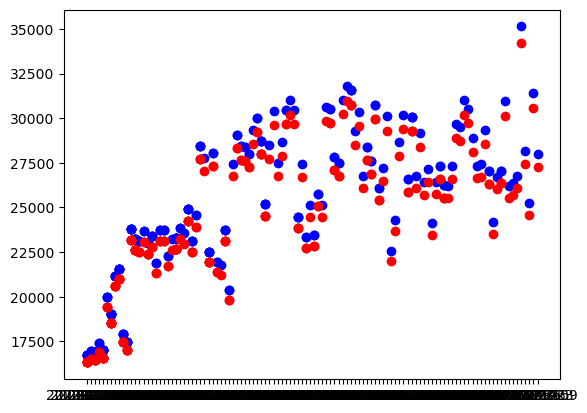

In [32]:
import matplotlib.pyplot as plt
plt.scatter(X_train_btcHigh['Date'], y_train_btcHigh, color = 'b')
plt.scatter(X_train_btcHigh['Date'], y_pred_btcHigh, color = 'r')
plt.show

### Predict the Future High Price

In [33]:
from datetime import datetime, timedelta
today = datetime.now().date()

tomorrow = today + timedelta(days=1)
formatted_tomorrow = tomorrow.strftime('%Y-%m-%d')
new_row = {'Date': formatted_tomorrow} #predict tomorrow

model = LinearRegressionRegularization()
utils = Utils()

#Split the data for predicting High
X = df
y = df['btcHigh']

#New training data
X = utils._newTrainingData(new_row, X)

# Split the data into training subsets
train_data, test_data, = model._split(X, y, ratio=0.7, random_state=123 )
X_train_btcHigh = train_data.drop(columns=['btcHigh'])
y_train_btcHigh = train_data['btcHigh']

#Adjust training data 
X_train_btcHigh = utils._updateTrainingData(X_train_btcHigh)
X_train_btcHigh = utils._replaceNanX(X_train_btcHigh)

has_nan = X_train_btcHigh.isna().any().any()

if (has_nan != True):
    #Predict
    y_pred_btcHigh = model._predict(X_train_btcHigh, y_train_btcHigh)
else:
    print ("Training Data contains Nan values, ", has_nan)

pd.options.mode.chained_assignment = None  #Hide warning
X_train_btcHigh["Date"] = utils._updateDate(X_train_btcHigh)

In [45]:
y_pred_btcHigh.tail(1)

227    29254.596914
Name: btcHigh, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

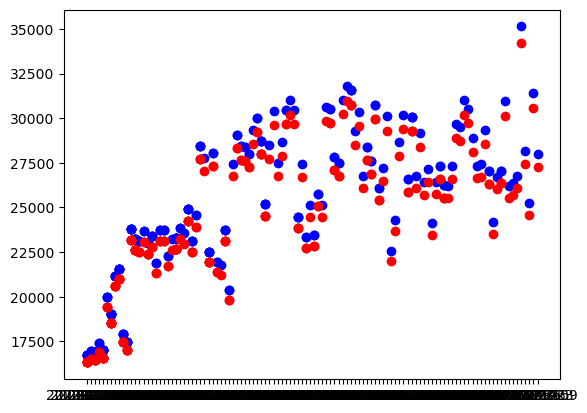

In [36]:
import matplotlib.pyplot as plt
plt.scatter(X_train_btcHigh['Date'], y_train_btcHigh, color = 'b')
plt.scatter(X_train_btcHigh['Date'], y_pred_btcHigh, color = 'r')
plt.show

In [37]:
from sklearn.metrics import r2_score
r2_score(y_train_btcHigh, y_pred_btcHigh)

0.9756622005883683

When merged, around 600 or 30% of data got lost

## Graph - 
Guiller - I'm getting a conversion issue when computing the linear regression, so I converted the date to integer. That's why the graph is messed up. No need to fix the graph below, we will replace those with actual and prediction 

In [38]:
df['DATE'] = pd.to_datetime(df['Date'])

In [39]:

des = df.describe()
exception = ['Date', 'DATE']
for col in df.columns:
    if col not in exception:
        df[col] = (df[col] - des[col]['min']) / (des[col]['max'] - des[col]['min'])

<Axes: xlabel='DATE', ylabel='ethOpen'>

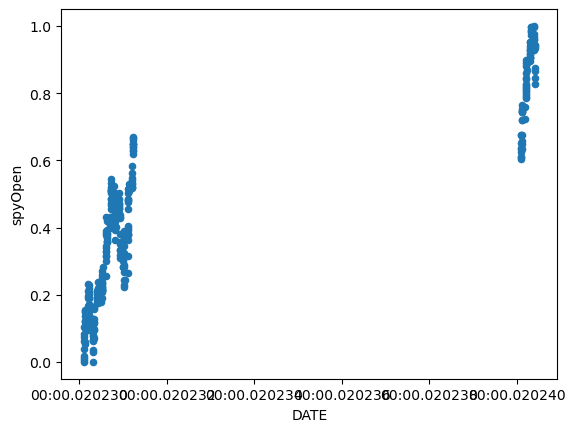

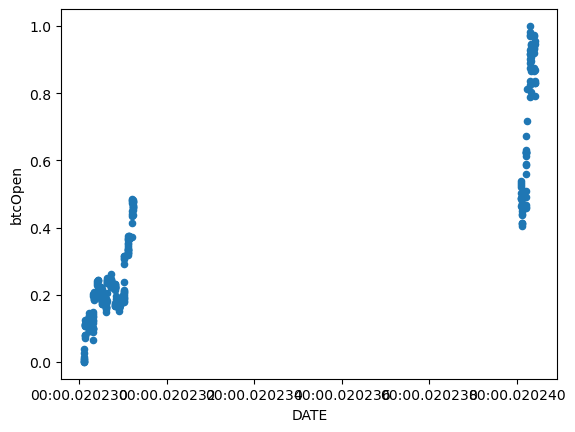

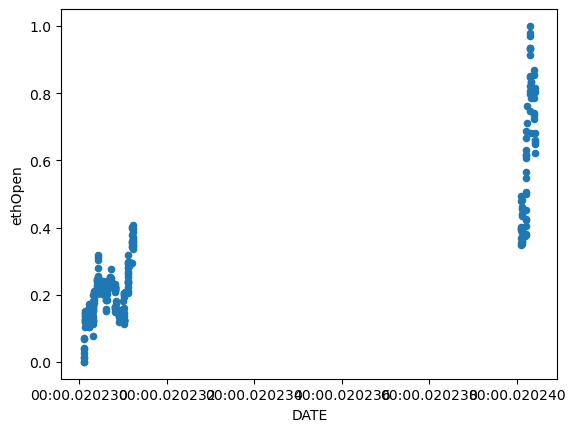

In [40]:
df.plot(x = 'DATE', y = 'spyOpen', kind = 'scatter')
df.plot(x = 'DATE', y = 'btcOpen', kind = 'scatter')
df.plot(x = 'DATE', y = 'ethOpen', kind = 'scatter')

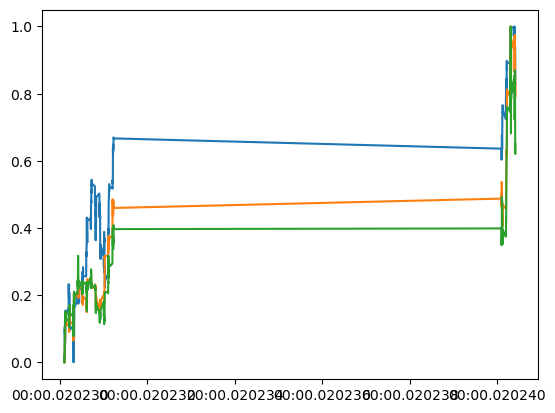

In [41]:
plt.plot(df['DATE'], df['spyOpen'], label = 'Spy Open')
plt.plot(df['DATE'], df['btcOpen'], label = 'Bitcoin Open')
plt.plot(df['DATE'], df['ethOpen'], label = 'Ethererum Open')
plt.show()

Emphasize the need to normalization data, otherwise we cannot compare them

# Normalize data

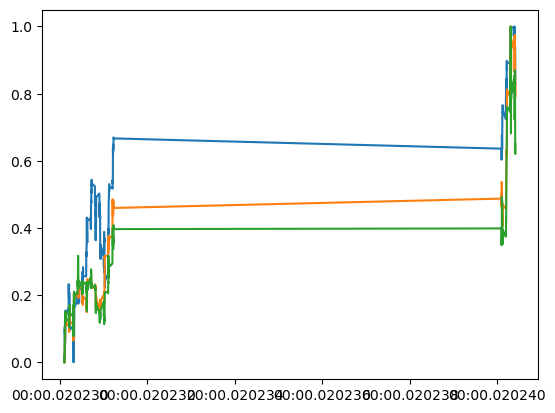

In [42]:
plt.plot(df['DATE'], df['spyOpen'], label = 'Spy Open')
plt.plot(df['DATE'], df['btcOpen'], label = 'Bitcoin Open')
plt.plot(df['DATE'], df['ethOpen'], label = 'Ethererum Open')
plt.show()